# Put three qubits into Greenberger-Horne-Zeilinger (GHZ) State \
### (1/sqrt(2))[1,0,0,0,0,0,0,1]

In [1]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram, array_to_latex, plot_bloch_multivector
from math import pi
%matplotlib inline

/tmp/ipykernel_7665/3566209066.py:3: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.cnot()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.cx as direct replacement.
  circuit.cnot(0, 1)
/tmp/ipykernel_7665/3566209066.py:4: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.cnot()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.cx as direct replacement.
  circuit.cnot(0, 2)


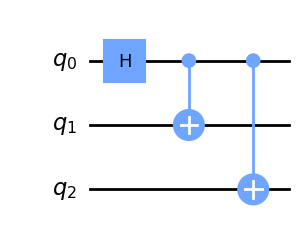

In [28]:
circuit = QuantumCircuit(3)  # circuit with two qubits
circuit.h(0)
circuit.cnot(0, 1)
circuit.cnot(0, 2)  # or circuit.cnot(1, 2) works
circuit.draw(output='mpl')

In [29]:
simulator = Aer.get_backend('statevector_simulator')  # create simulator returning state vector of qubit
result = execute(circuit, backend = simulator).result()  # only single shot needed
statevector = result.get_statevector()
array_to_latex(statevector, prefix="\\text{statevector = }\n") 

<IPython.core.display.Latex object>

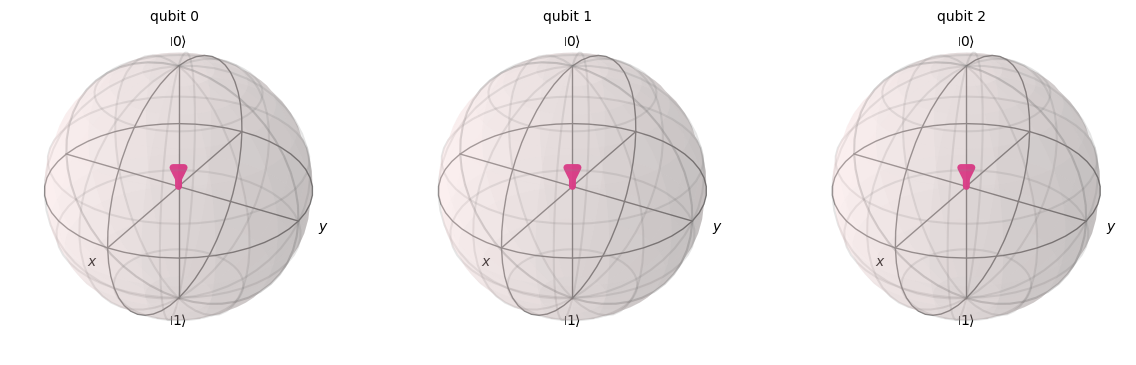

In [13]:
plot_bloch_multivector(statevector)  # print bloch sphere

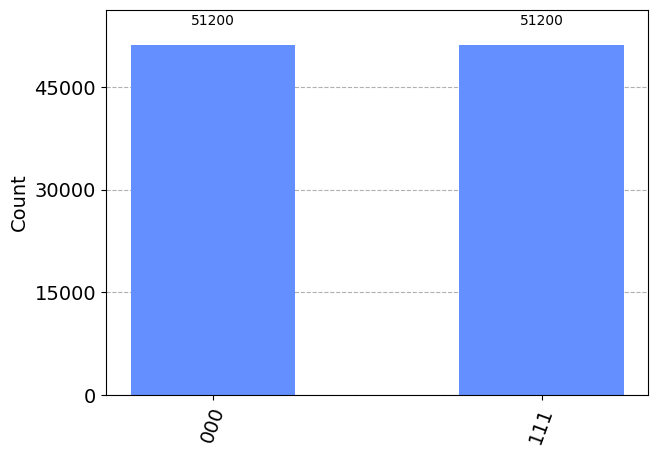

In [30]:
circuit.measure_all()
simulator = Aer.get_backend('qasm_simulator')  # create simulator
result = execute(circuit, backend = simulator, shots = 102400).result()  # execute simulator 1024 times
plot_histogram(result.get_counts())  #plot counts of all executions